In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install statsmodels

In [ ]:
!pip install textblob
!pip install spacy
!pip install gensim

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_csv(r'C:\Users\ephre\Documents\Financial News and Stock Price Integration\data\raw_analyst_ratings\raw_analyst_ratings.csv', parse_dates=['date'])


In [5]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
df.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [9]:
df.shape

(1407328, 6)

In [10]:
article_counts = df.groupby('publisher').size()
article_counts.sort_values(ascending=False)

publisher
Paul Quintaro             228373
Lisa Levin                186979
Benzinga Newsdesk         150484
Charles Gross              96732
Monica Gerson              82380
                           ...  
White Diamond Research         1
Michael Zanger                 1
Stock Market Newz              1
Forexpros.com                  1
Jim Pearce                     1
Length: 1034, dtype: int64

In [11]:
df["headline_length"] = df["headline"].apply(len)

In [12]:
df['date'] = pd.to_datetime(df['date'], utc=True)  # Convert to UTC time zone
daily_headlines = df.groupby('date').size()
daily_headlines

date
2009-02-14 00:00:00+00:00    1
2009-04-27 00:00:00+00:00    2
2009-04-29 00:00:00+00:00    1
2009-05-22 00:00:00+00:00    1
2009-05-27 00:00:00+00:00    6
                            ..
2020-06-11 20:49:41+00:00    1
2020-06-11 20:51:33+00:00    1
2020-06-11 21:01:39+00:00    1
2020-06-11 21:11:20+00:00    1
2020-06-11 21:12:35+00:00    1
Length: 39956, dtype: int64

Text Analysis(Sentiment analysis & Topic Modeling)

In [15]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ephre\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
sentiment_data=df.copy()
sia = SentimentIntensityAnalyzer()

In [20]:
# Calculate the sentiment of the headlines
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,0.0000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,0.0000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,0.0000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,0.0000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,0.2960
...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX,38,0.2023
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX,52,-0.3818
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX,56,0.0000
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX,54,0.0000


In [21]:
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])
sentiment_data

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,39,0.0000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,42,0.0000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,29,0.0000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,44,0.0000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,87,0.2960,Neutral
...,...,...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX,38,0.2023,Neutral
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX,52,-0.3818,Negative
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX,56,0.0000,Neutral
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX,54,0.0000,Neutral


In [22]:
sentiment_data['sentiment_category'].value_counts()

Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: sentiment_category, dtype: int64

Time Series Analysis:

In [23]:
time_series_data = pd.DataFrame({'date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('date', inplace=True)

In [24]:
time_series_data

,Headlines_Count
date,
2009-02-14 00:00:00+00:00,1
2009-04-27 00:00:00+00:00,2
2009-04-29 00:00:00+00:00,1
2009-05-22 00:00:00+00:00,1
2009-05-27 00:00:00+00:00,6
...,...
2020-06-11 20:49:41+00:00,1
2020-06-11 20:51:33+00:00,1
2020-06-11 21:01:39+00:00,1


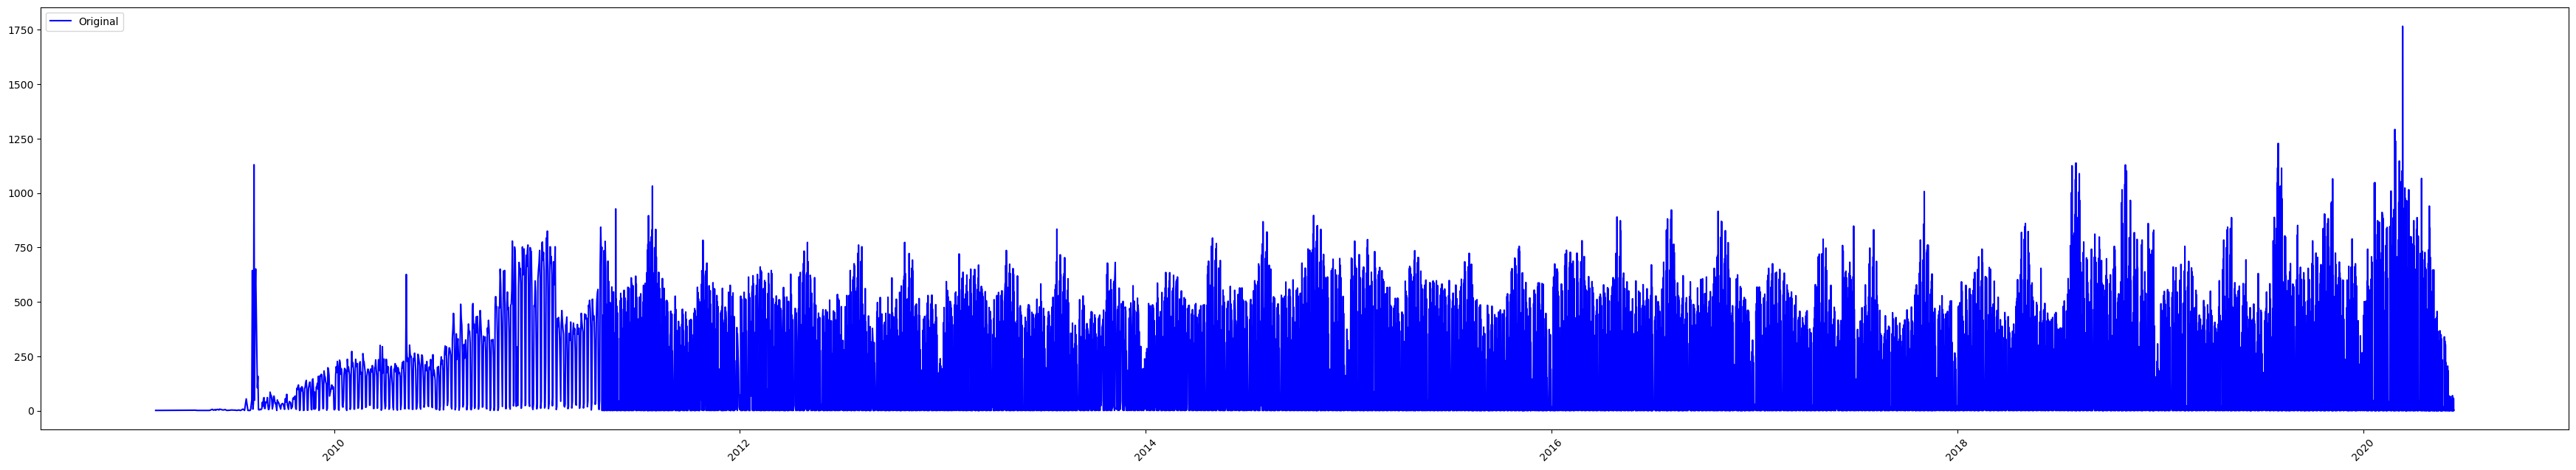

In [27]:
plt.figure(figsize=(35, 25))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

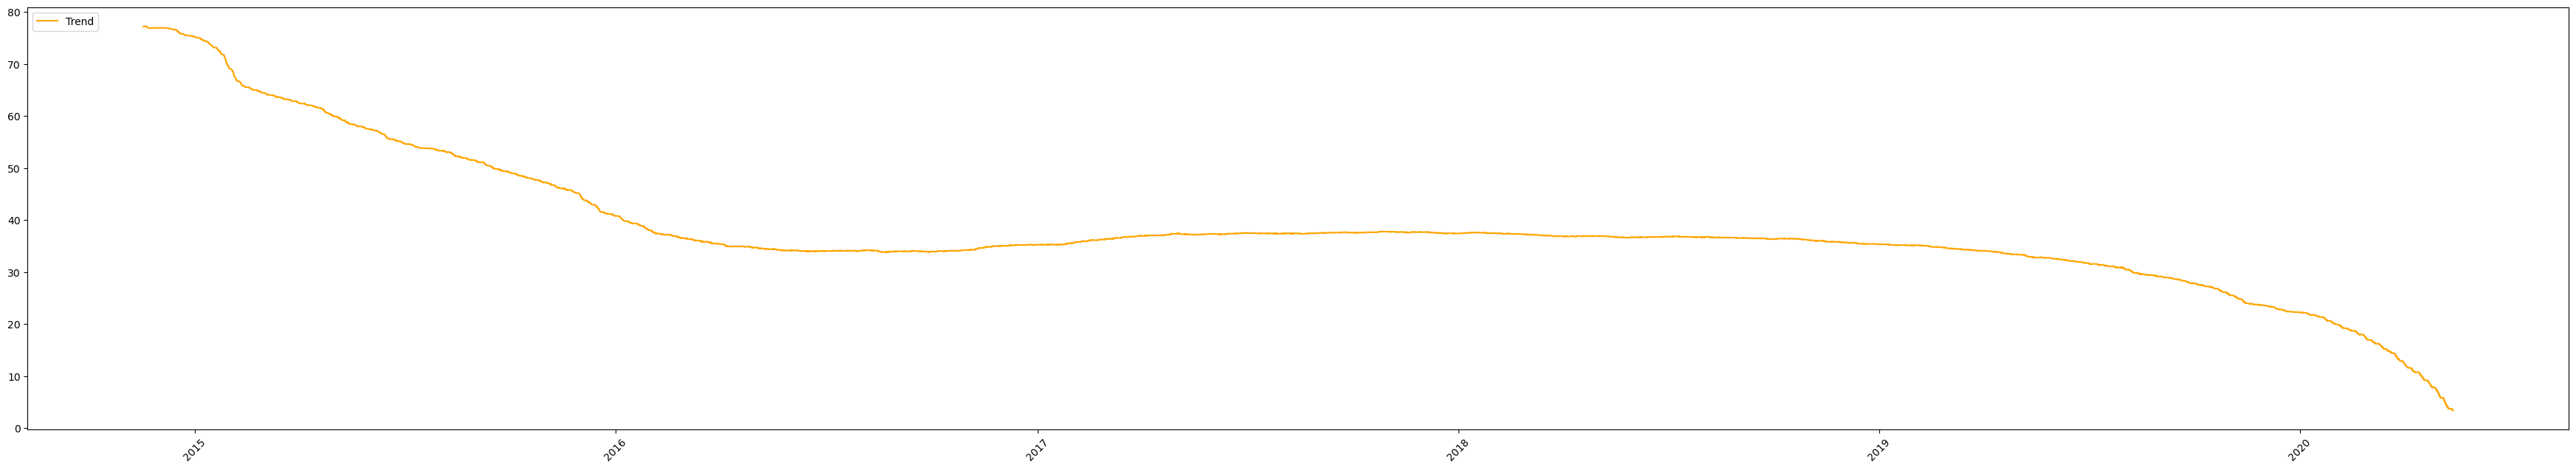

In [28]:
plt.figure(figsize=(35, 25))
decomposition = seasonal_decompose( time_series_data['Headlines_Count'], model='additive', period=10000)

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

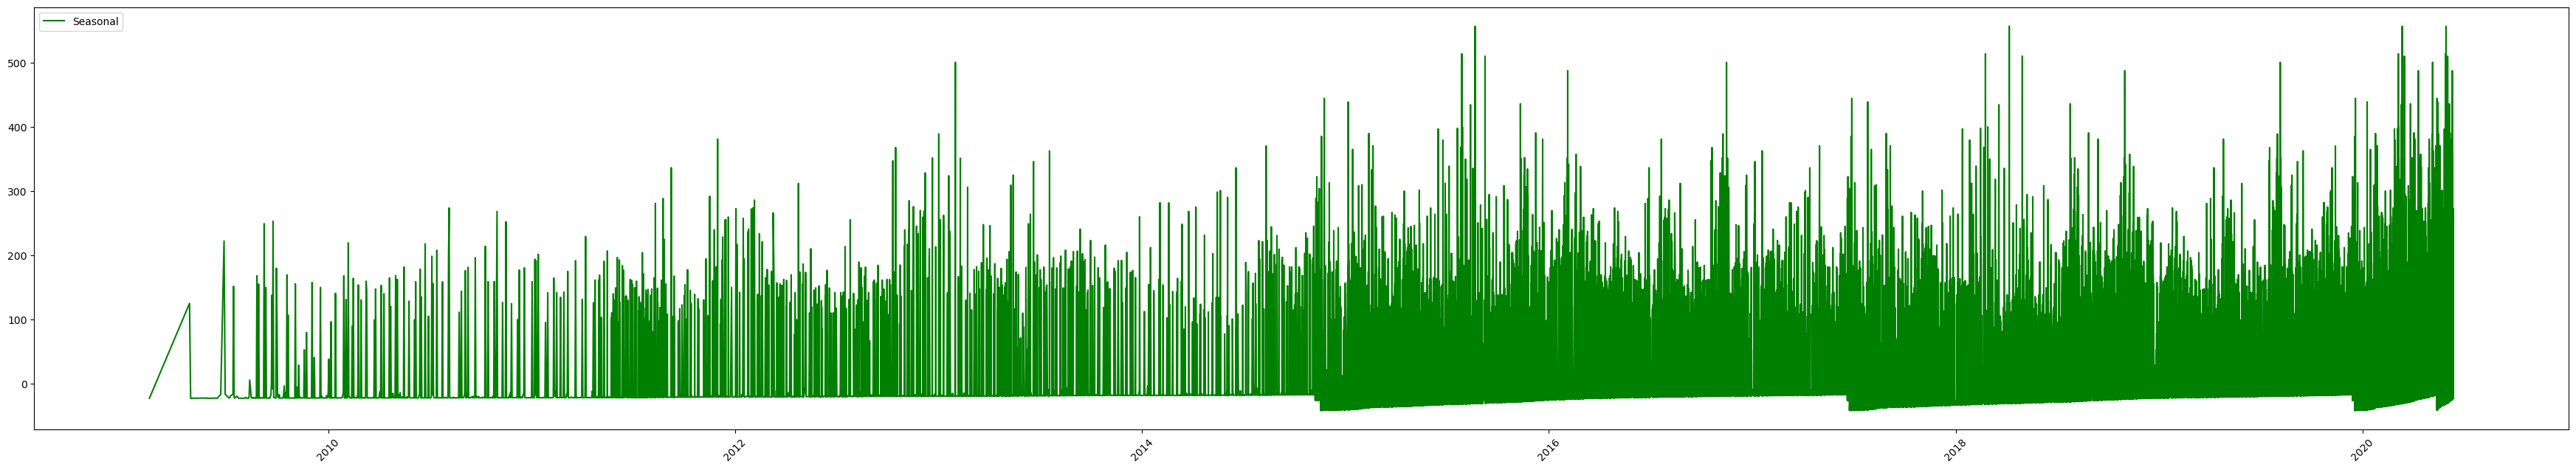

In [29]:
plt.figure(figsize=(35, 25))
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

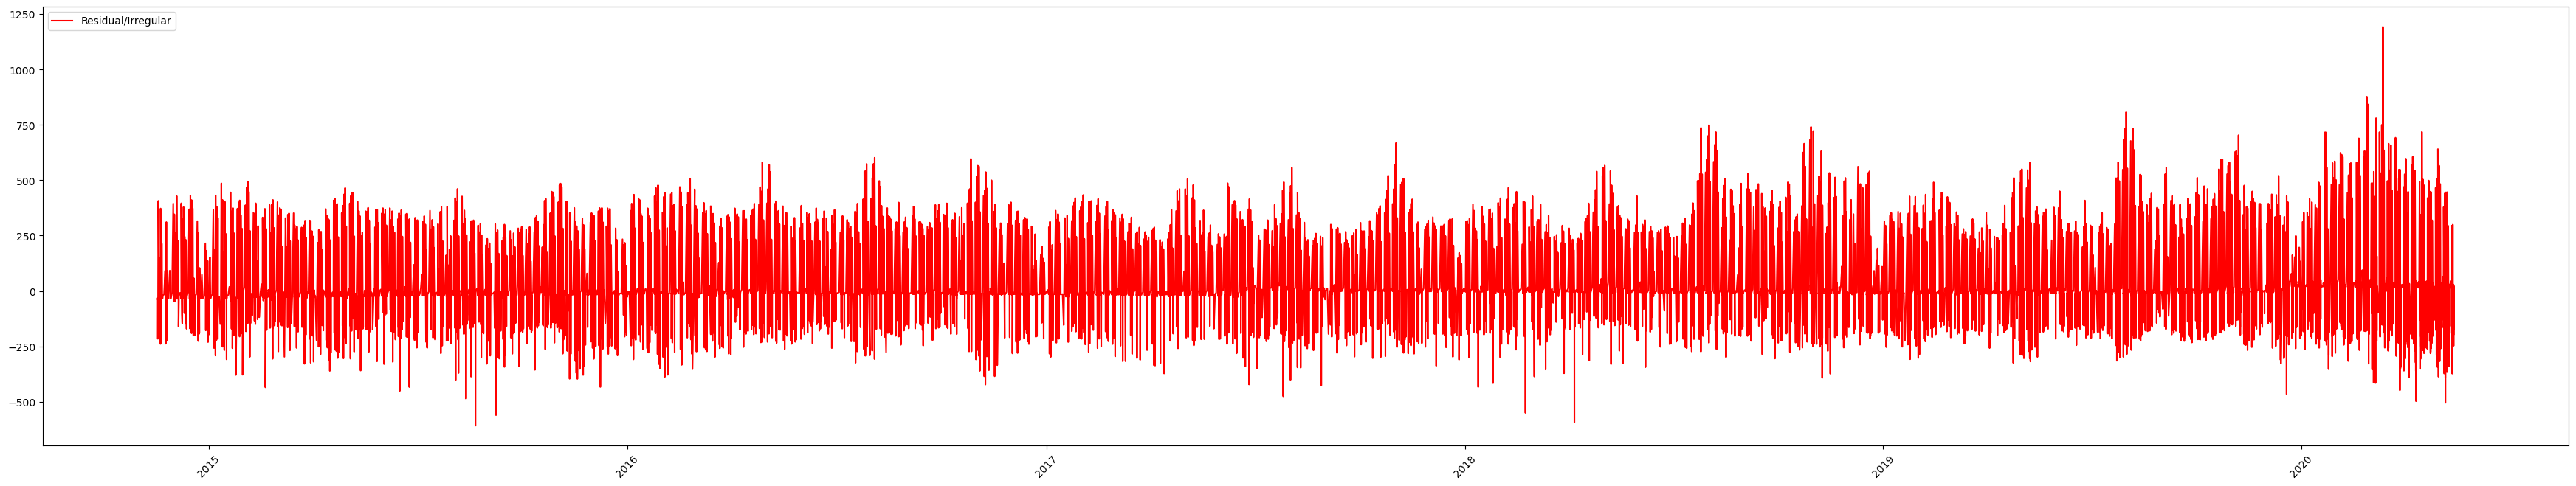

In [30]:
plt.figure(figsize=(35, 25))
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

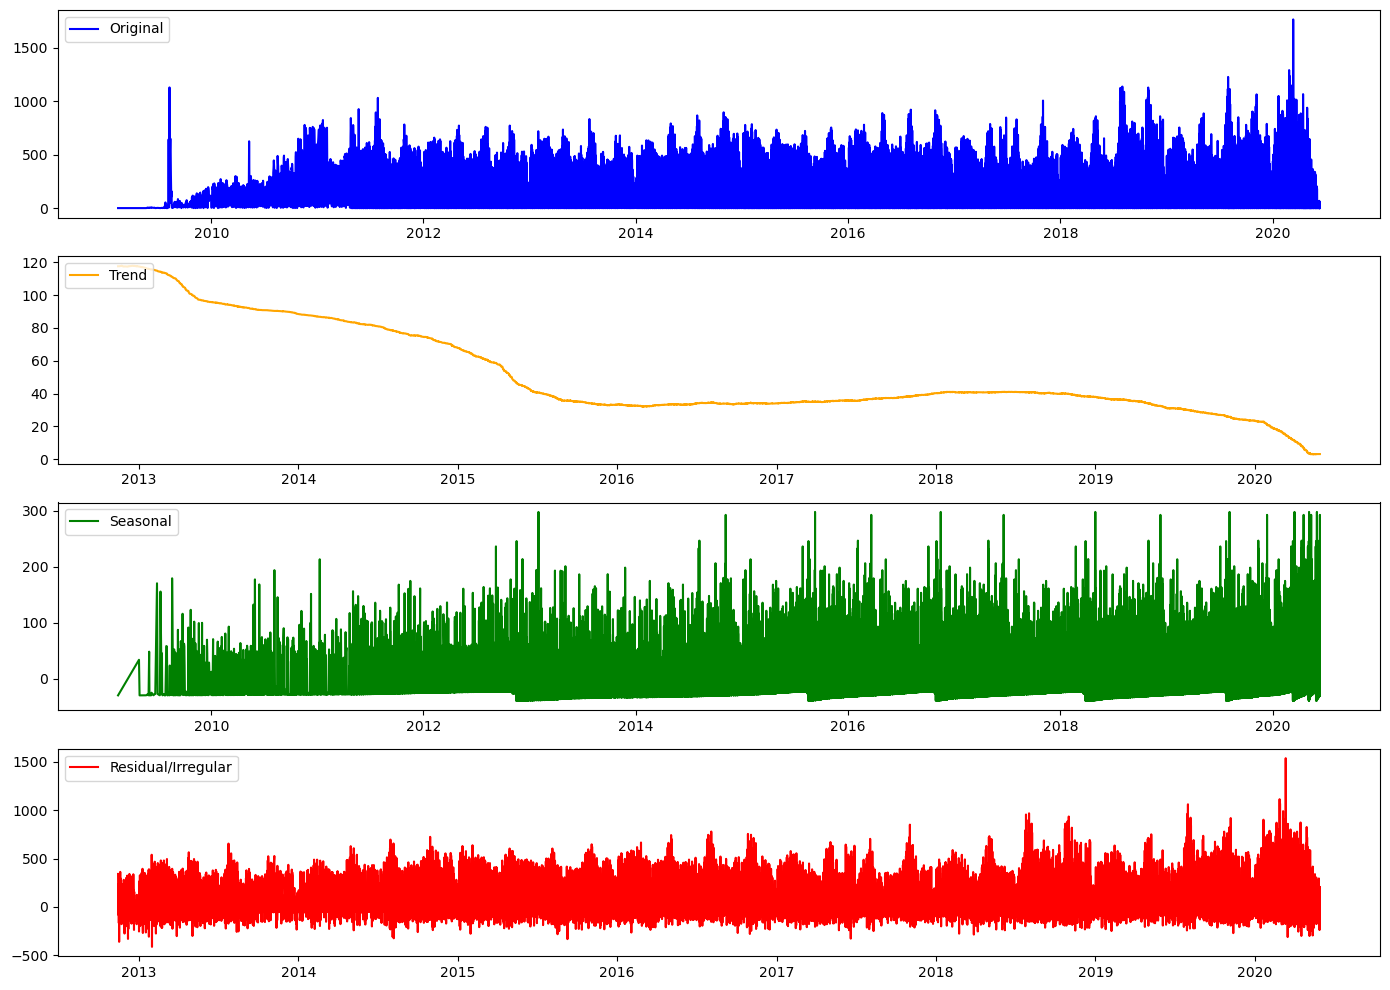

In [31]:
# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2009-02", end="2010-02", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=5000)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [32]:
from collections import Counter

# 1. Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the top publishers
top_publishers = publisher_counts.head(10)
print("Top 10 Publishers:\n", top_publishers)

# 2. Analyze the types of news reported by each publisher
# Assuming you have a 'category' or 'topic' column categorizing the news
publisher_topic_distribution = df.groupby(['publisher', 'headline']).size().unstack(fill_value=0)
print("Publisher Topic Distribution:\n", publisher_topic_distribution)

# 3. Analyze publisher domains if email addresses are used
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)

# Count the number of articles per domain
domain_counts = df['domain'].value_counts()

# Display the top domains
top_domains = domain_counts.head(10)
print("Top 10 Domains:\n", top_domains)

# Compare domain contributions
publisher_domain_distribution = df.groupby(['domain', 'headline']).size().unstack(fill_value=0)
print("Domain Topic Distribution:\n", publisher_domain_distribution)


Top 10 Publishers:
 Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: publisher, dtype: int64
Publisher Topic Distribution:
 headline                    "A Trader's Guide to Japanese Policy Makers' Language on the Yen " via ForexLive  \
publisher                                                                                                      
47ertrends                                                                  0                                  
AARP                                                                        0                                  
ABNNewswire                                                                 0                                  
Aakin                                                                       0  